In [122]:
# load data and imports
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split

clean_titanic_df = pd.read_csv('preprocessed_titanic.csv')

clean_titanic_df = clean_titanic_df.drop(columns=['Name'])

train, test= train_test_split(clean_titanic_df,random_state=23, test_size = 0.2)

X_train, y_train = train.drop(columns=['Survived']), train['Survived']
X_test, y_test = test.drop(columns=['Survived']), test['Survived']

clean_titanic_df.head()


,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,0,22.0,1,0,7.2500,0
1,1,2,1,1,1,38.0,1,0,71.2833,1
2,2,3,1,3,1,26.0,0,0,7.9250,0
3,3,4,1,1,1,35.0,1,0,53.1000,0
4,4,5,0,3,0,35.0,0,0,8.0500,0


   Pclass  Survived
0       1  0.626437
1       2  0.490066
2       3  0.245478
   Sex  Survived
0    0  0.190789
1    1  0.746094
   Embarked  Survived
0         0  0.338521
1         1  0.570423
2         2  0.410714


KeyError: "['SibSP'] not in index"

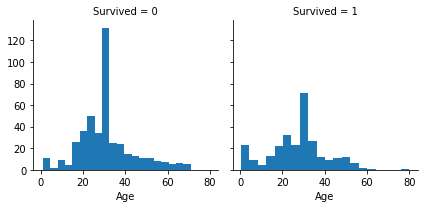

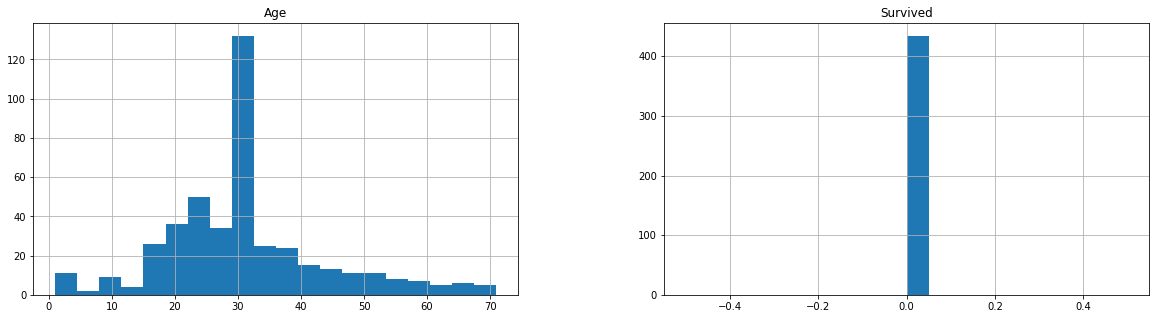

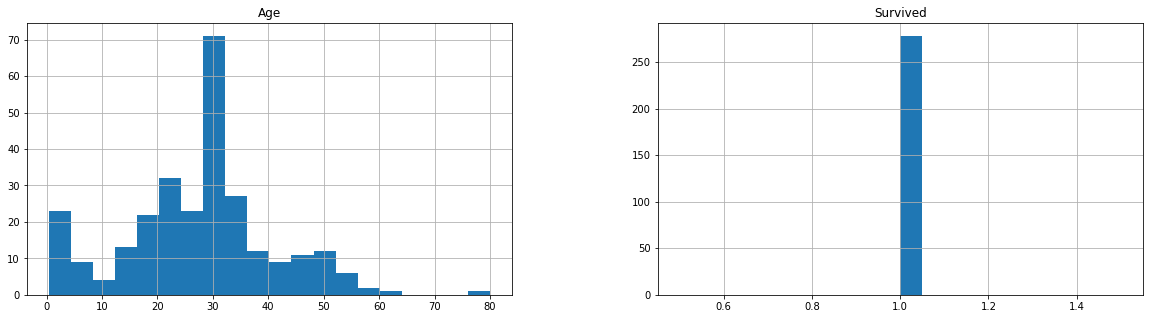

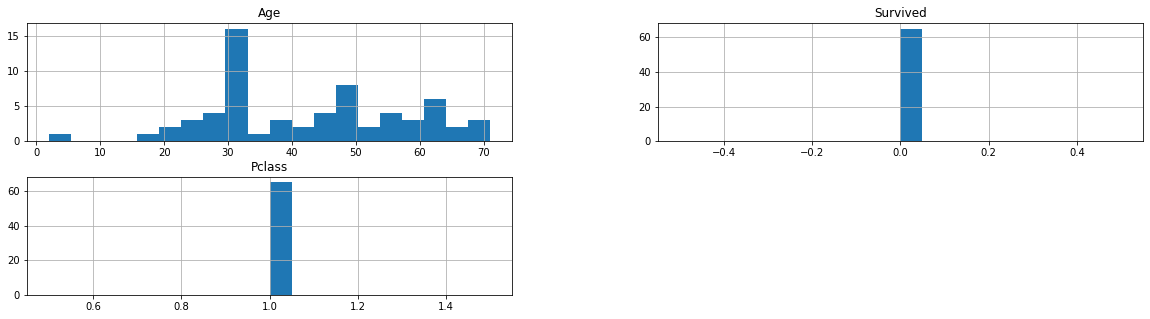

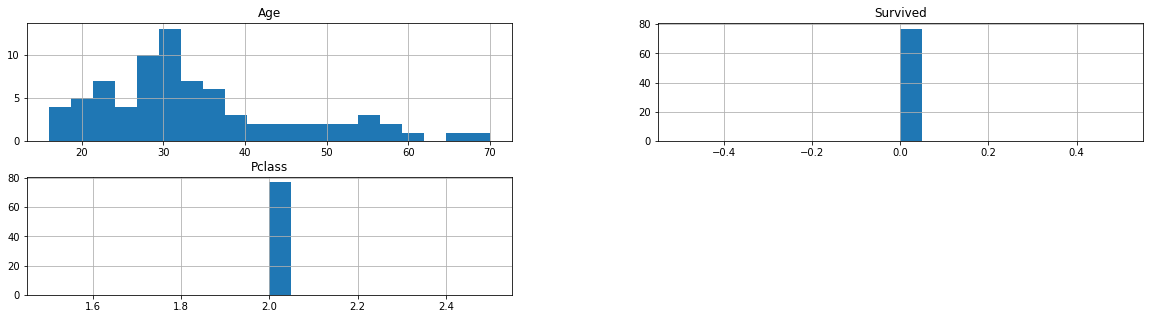

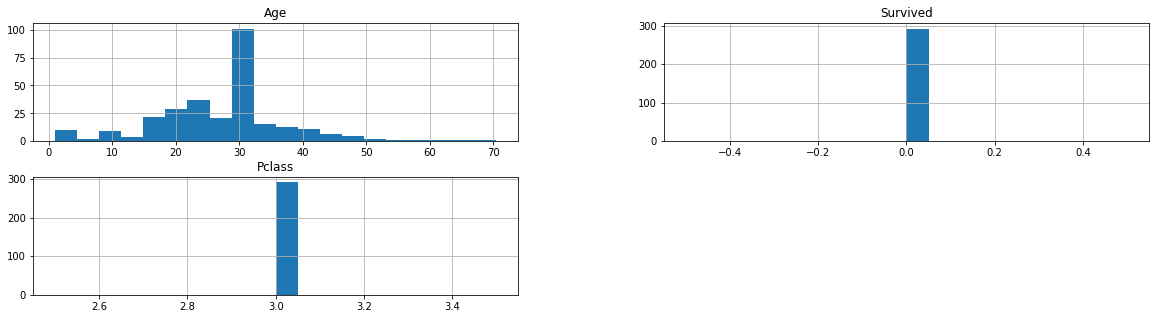

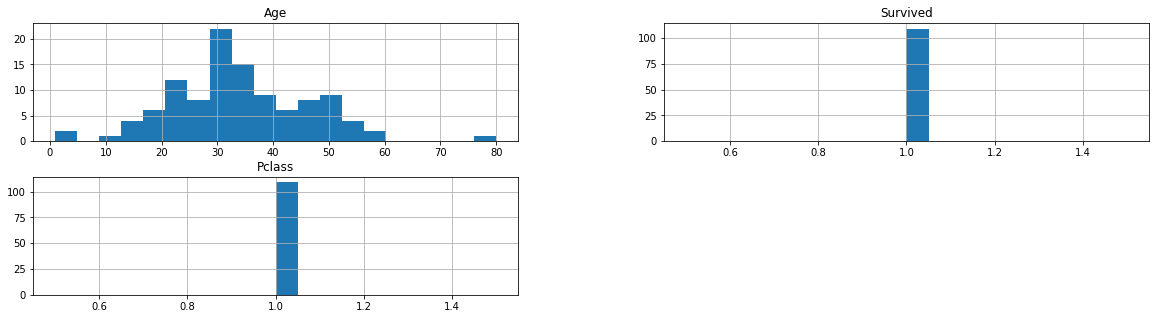

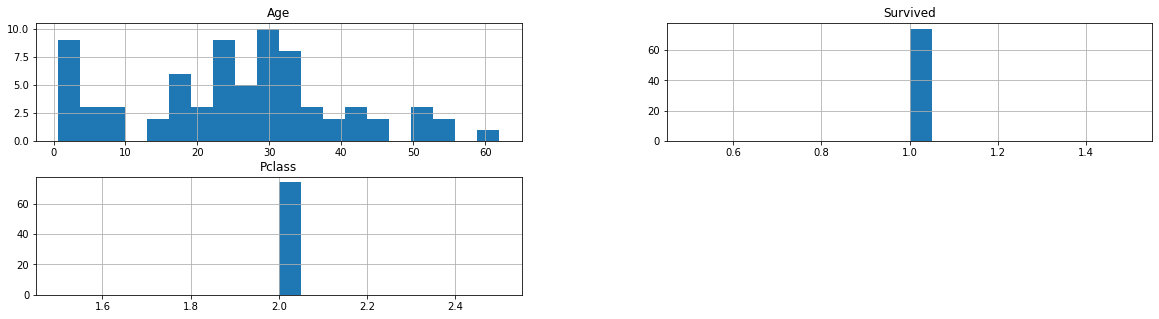

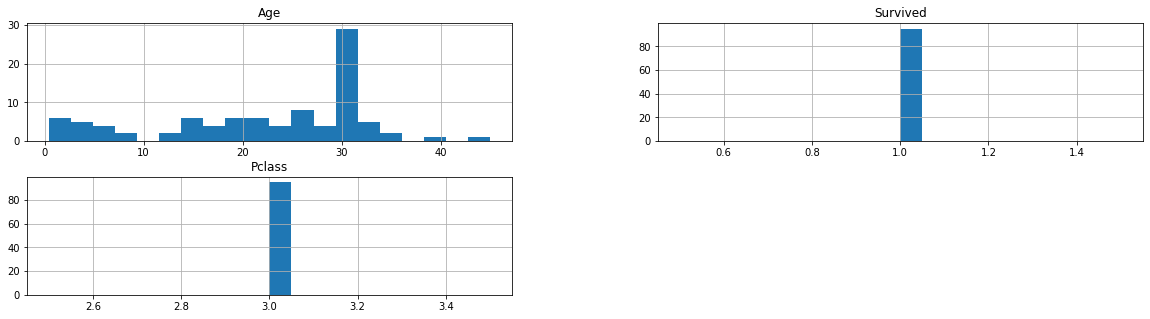

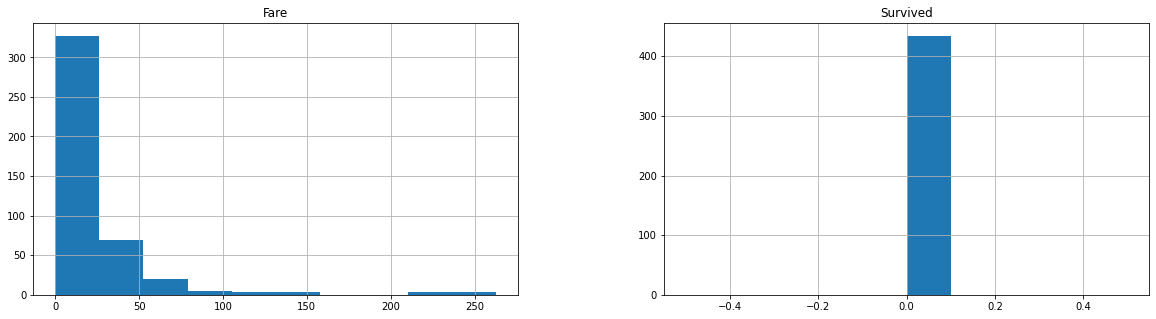

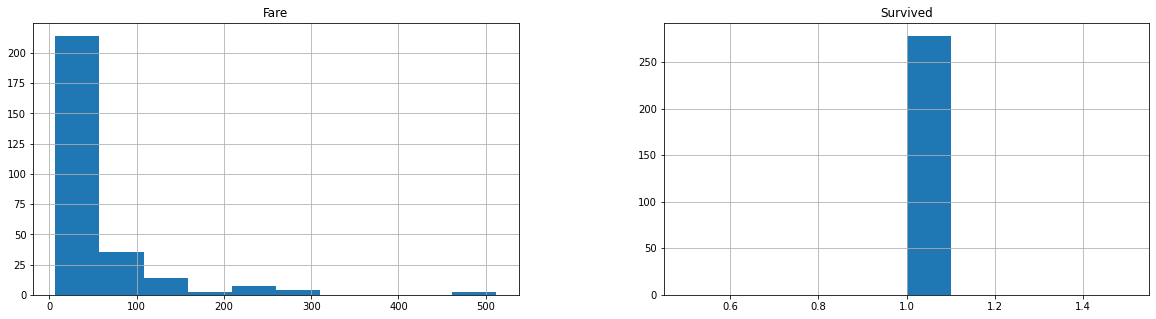

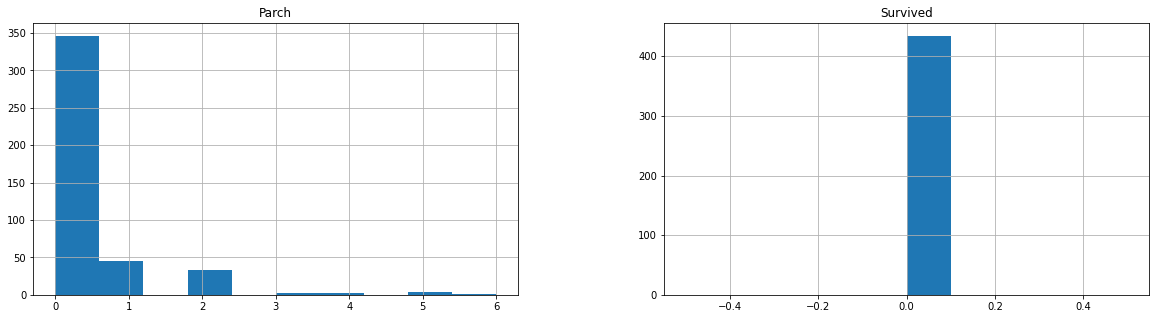

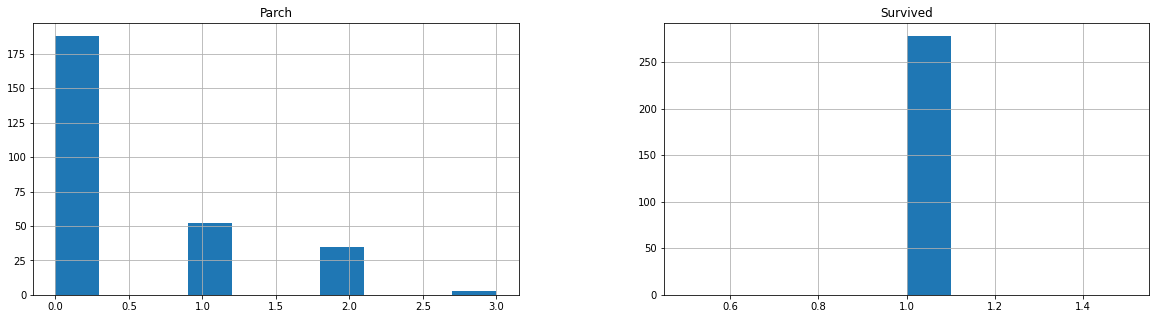

In [123]:
"""""
First visualize the data to look for correlation or other patterns
"""""

# check correlation between pairs of features. We are gonna see the average of people who survived by category for each categoric feature

survived_class = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(survived_class)

survived_sex = train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Sex')
print(survived_sex)

survived_embarked = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked')
print(survived_embarked)

# using histograms to visualize correlation between numerical data and survival
graph = sbn.FacetGrid(train, col = 'Survived')
graph.map(plt.hist, 'Age', bins = 20)

survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

# correlating age with survival
train[['Age', 'Survived']].groupby('Survived').hist(bins=20, figsize = (20, 5))

# correlating age and class with survival
train[['Age', 'Survived', 'Pclass']].groupby(['Survived', 'Pclass']).hist(bins=20, figsize = (20, 5))

# correlating fare with survival
train[['Fare', 'Survived']].groupby(['Survived']).hist(bins=10, figsize = (20, 5))

# correlating fare with survival
train[['Parch', 'Survived']].groupby(['Survived']).hist(bins=10, figsize = (20, 5))

train[['SibSP', 'Survived']].groupby(['Survived']).hist(bins=10, figsize = (20, 5))

"""""
Insights and further adjustemnts to the data:

    Survival is correlated to age, fare, class, and sex. 
    
    based on the the histograms below:
    
        - people who did not survive were mainly around 30 years old and older.
        
        - people who did survive were 30 years old and younger. There is special density in the group of age<5.
        
        - Most people who belonged to the first class survived
        
        - most people who belonged to the third class did not survive
        
        - most people who did not survive did not pay a fare over 50 dollars
    
    possible data tunning:
        
        - consider turning age into categorical data
        
        - combine SibSp and Parch into one column. Possibily turn it into a binary category of family and no family
        
        - 
    
"""""





In [25]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lor = LogisticRegression(penalty= 'none', max_iter= 1000, solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_test, lor.predict(X_test)))




              precision    recall  f1-score   support

           0       0.81      0.82      0.81       115
           1       0.67      0.66      0.66        64

    accuracy                           0.76       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [26]:
# categorical bayes classifier

from sklearn.naive_bayes import CategoricalNB

categorical_X = clean_titanic_df[['Pclass', 'Sex', 'Embarked']]
categorical_y = clean_titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(categorical_X, categorical_y, random_state = 23, test_size = 0.2 )

NB = CategoricalNB()
NB.fit(X_train, y_train)
print(classification_report(y_test, NB.predict(X_test)))



              precision    recall  f1-score   support

           0       0.83      0.81      0.82       115
           1       0.67      0.70      0.69        64

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.77      0.77       179



In [28]:
# gaussian bayes classifier 

from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(clean_titanic_df.drop(columns=['Survived']), clean_titanic_df['Survived'], random_state = 23, test_size = 0.2 )

NB = GaussianNB()
NB.fit(X_train, y_train)
print(classification_report(y_test, NB.predict(X_test)))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       115
           1       0.78      0.72      0.75        64

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.83      0.83       179



In [39]:
# support vector machine 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
